<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Atividade:-BMW-Pricing-Challenge" data-toc-modified-id="Atividade:-BMW-Pricing-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Atividade: BMW Pricing Challenge</a></span><ul class="toc-item"><li><span><a href="#Etapa-1.-Leitura-e-tratamento-da-base-de-dados" data-toc-modified-id="Etapa-1.-Leitura-e-tratamento-da-base-de-dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Etapa 1. Leitura e tratamento da base de dados</a></span></li><li><span><a href="#Etapa-2.-Visualização-de-dados-e-estatística-descritiva" data-toc-modified-id="Etapa-2.-Visualização-de-dados-e-estatística-descritiva-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Etapa 2. Visualização de dados e estatística descritiva</a></span><ul class="toc-item"><li><span><a href="#Registration-Date--e-Sold-At-Date" data-toc-modified-id="Registration-Date--e-Sold-At-Date-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Registration Date  e Sold At Date</a></span></li><li><span><a href="#Frequencia-de-variáveis" data-toc-modified-id="Frequencia-de-variáveis-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Frequencia de variáveis</a></span></li><li><span><a href="#Transformando-a-coluna-Fuel" data-toc-modified-id="Transformando-a-coluna-Fuel-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Transformando a coluna Fuel</a></span></li></ul></li><li><span><a href="#Estatística" data-toc-modified-id="Estatística-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Estatística</a></span><ul class="toc-item"><li><span><a href="#Visualizando-as-relações-entre-o-alvo-e-variáveis-de-entrada" data-toc-modified-id="Visualizando-as-relações-entre-o-alvo-e-variáveis-de-entrada-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Visualizando as relações entre o alvo e variáveis de entrada</a></span></li><li><span><a href="#Correlação" data-toc-modified-id="Correlação-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Correlação</a></span></li></ul></li></ul></li></ul></div>

### Atividade: BMW Pricing Challenge

Objetivo: tratar e visualizar dados para predição do valor de um carro usado

Etapas da atividade:
1. Leitura da base de dados: utilizando o Pandas, ler a base de dados localizada em data/bmw_pricing_challange. Ao fim dessa etapa, pode-se responder as perguntas:
  *  Quais os atributos de entrada da base?
  *  Qual o atributo de saída dabase?
  *  Quantos clientes existem?
  *  Existe correlação entre as variáveis? 
  
2. Tratamento dos dados: verificar o estado da base, eliminando dados ausentes, duplicatas e realizando transformações nos atributos da base caso necessário
3. Visualização de dados: utilizando o seaborn ou o matplotlib (ou ambos), gerar gráficos dos dados disponíveis de diferentes tipos (e.g. barchart, piechar, boxplot). Adicionalmente, visualizar a estatística dos dados. Quais conclusões ou hipóteses podem ser levantadas ao fim dessa etapa?

#### Etapa 1. Leitura e tratamento da base de dados



In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('data/bmw_pricing_challenge.csv')
df

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,BMW,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,BMW,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,BMW,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01


In [5]:
### quantas linhas e colunas existem na tabela?

df.shape

(4843, 18)

In [6]:
### precisa da coluna maker_key?
df['maker_key'].unique()
df.drop(['maker_key'],axis=1,inplace=True)

In [7]:
### valores nulos
df.isnull().sum()

model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
### substituir True e False por 0 e 1 
df['feature_1'] = df['feature_1'].replace({True: 1, False: 0})
df['feature_2'] = df['feature_2'].replace({True: 1, False: 0})
df['feature_3'] = df['feature_3'].replace({True: 1, False: 0})
df['feature_4'] = df['feature_4'].replace({True: 1, False: 0})
df['feature_5'] = df['feature_5'].replace({True: 1, False: 0})
df['feature_6'] = df['feature_6'].replace({True: 1, False: 0})
df['feature_7'] = df['feature_7'].replace({True: 1, False: 0})
df['feature_8'] = df['feature_8'].replace({True: 1, False: 0})

In [10]:
df

,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,118,140411,100,2012-02-01,diesel,black,convertible,1,1,0,0,1,1,1,0,11300,2018-01-01
1,M4,13929,317,2016-04-01,petrol,grey,convertible,1,1,0,0,0,1,1,1,69700,2018-02-01
2,320,183297,120,2012-04-01,diesel,white,convertible,0,0,0,0,1,0,1,0,10200,2018-02-01
3,420,128035,135,2014-07-01,diesel,red,convertible,1,1,0,0,1,1,1,1,25100,2018-02-01
4,425,97097,160,2014-12-01,diesel,silver,convertible,1,1,0,0,0,1,1,1,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,0,1,0,0,0,0,1,0,14600,2018-08-01
4839,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,0,1,0,0,0,0,1,1,17500,2018-08-01
4840,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,0,1,0,0,0,0,1,1,17000,2018-09-01
4841,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,1,1,0,0,0,0,1,1,22700,2018-09-01


#### Etapa 2. Visualização de dados e estatística descritiva

##### Registration Date  e Sold At Date

In [11]:
### mudar para datetime
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['sold_at'] = pd.to_datetime(df['sold_at'])

<Axes: xlabel='registration_date'>

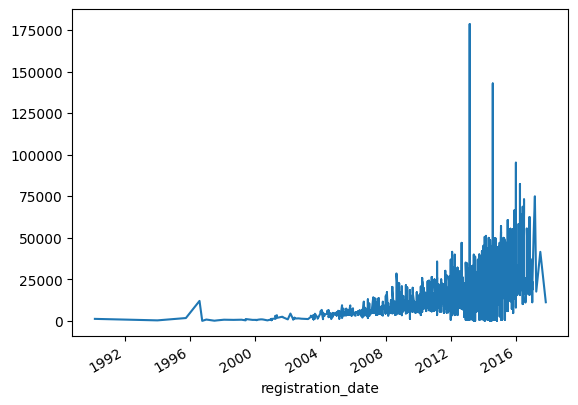

In [12]:
df_re = df.set_index('registration_date')
df_re['price'].plot() 

<Axes: xlabel='sold_at'>

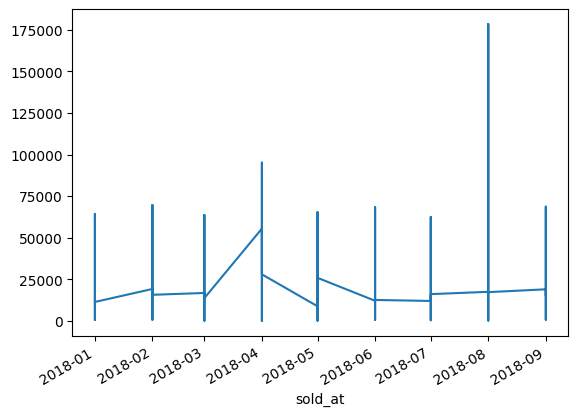

In [13]:
df_sold = df.set_index('sold_at')
df_sold['price'].plot() 

In [14]:
### Criar colunas de datas
df['registration day'] = df_re.index.day 
df['registration month'] = df_re.index.month
df['registration dayofweek'] = df_re.index.dayofweek
df['registration year'] = df_re.index.year

df['sold day'] = df_sold.index.day 
df['sold month'] = df_sold.index.month
df['sold dayofweek'] = df_sold.index.dayofweek
df['sold year'] = df_sold.index.year

In [15]:
df['sold year'].unique()

array([2018])

In [16]:
print(df['registration day'].unique())
print(df['sold day'].unique())

[1]
[1]


In [17]:
df

,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,price,sold_at,registration day,registration month,registration dayofweek,registration year,sold day,sold month,sold dayofweek,sold year
0,118,140411,100,2012-02-01,diesel,black,convertible,1,1,0,...,11300,2018-01-01,1,2,2,2012,1,1,0,2018
1,M4,13929,317,2016-04-01,petrol,grey,convertible,1,1,0,...,69700,2018-02-01,1,4,4,2016,1,2,3,2018
2,320,183297,120,2012-04-01,diesel,white,convertible,0,0,0,...,10200,2018-02-01,1,4,6,2012,1,2,3,2018
3,420,128035,135,2014-07-01,diesel,red,convertible,1,1,0,...,25100,2018-02-01,1,7,1,2014,1,2,3,2018
4,425,97097,160,2014-12-01,diesel,silver,convertible,1,1,0,...,33400,2018-04-01,1,12,0,2014,1,4,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,0,1,0,...,14600,2018-08-01,1,10,3,2015,1,8,2,2018
4839,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,0,1,0,...,17500,2018-08-01,1,6,0,2015,1,8,2,2018
4840,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,0,1,0,...,17000,2018-09-01,1,10,3,2015,1,9,5,2018
4841,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,1,1,0,...,22700,2018-09-01,1,4,4,2016,1,9,5,2018


C:\Users\lucas\AppData\Local\Temp\ipykernel_25148\3836742741.py:1: FutureWarning: The provided callable <function mean at 0x00000190A52700E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = df.pivot_table(index='registration month', columns='registration dayofweek',


<Axes: xlabel='registration dayofweek', ylabel='registration month'>

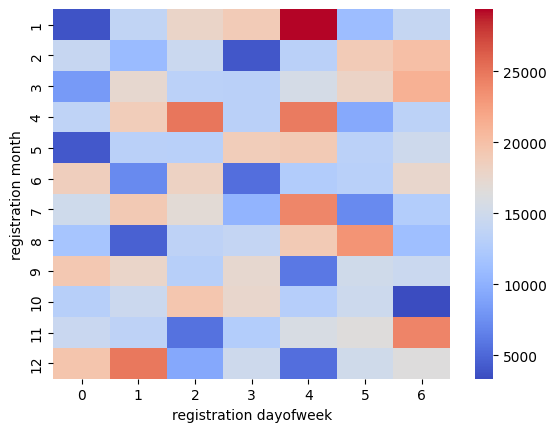

In [18]:
df_pivot = df.pivot_table(index='registration month', columns='registration dayofweek',
                                 values='price', aggfunc=np.mean)
sns.heatmap(df_pivot, cmap='coolwarm')

C:\Users\lucas\AppData\Local\Temp\ipykernel_25148\2513944864.py:1: FutureWarning: The provided callable <function mean at 0x00000190A52700E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = df.pivot_table(index='sold month', columns='sold dayofweek',


<Axes: xlabel='sold dayofweek', ylabel='sold month'>

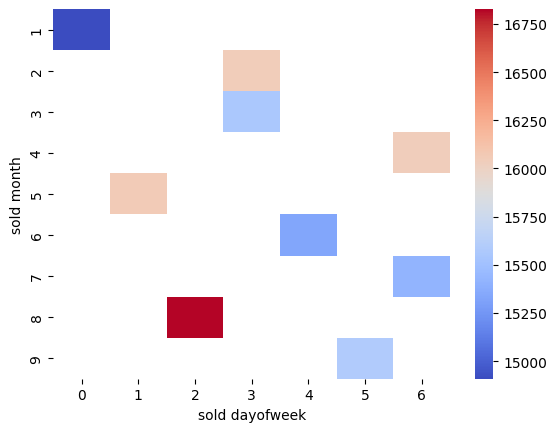

In [19]:
df_pivot = df.pivot_table(index='sold month', columns='sold dayofweek',
                                 values='price', aggfunc=np.mean)
sns.heatmap(df_pivot, cmap='coolwarm')

##### Frequencia de variáveis

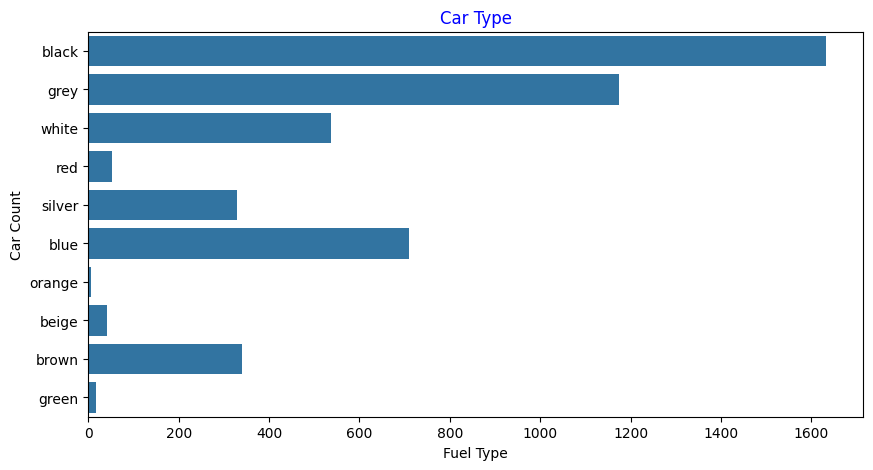

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['paint_color'])
plt.title('Car Type',color="blue")
plt.xlabel("Fuel Type")
plt.ylabel("Car Count")
plt.show()

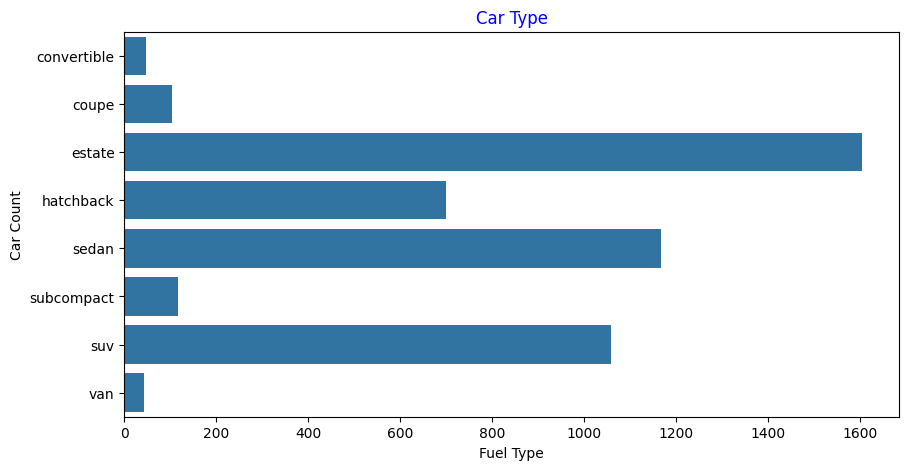

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df['car_type'])
plt.title('Car Type',color="blue")
plt.xlabel("Fuel Type")
plt.ylabel("Car Count")
plt.show()

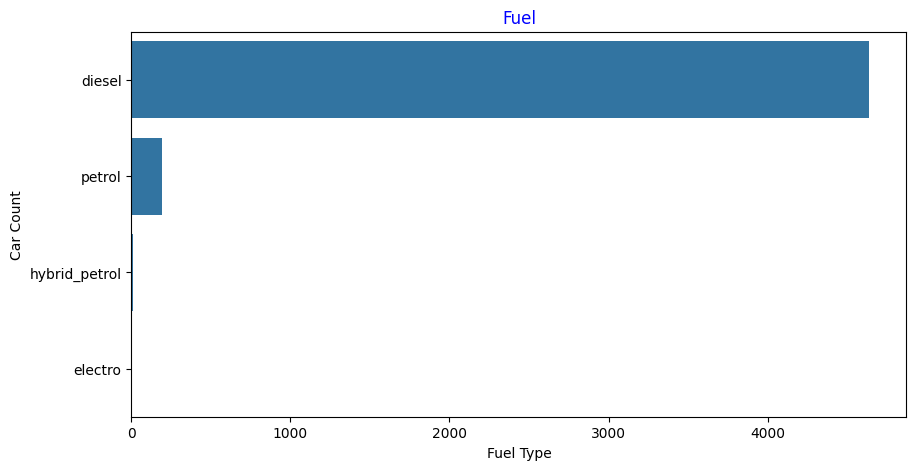

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df['fuel'])
plt.title('Fuel',color="blue")
plt.xlabel("Fuel Type")
plt.ylabel("Car Count")
plt.show()

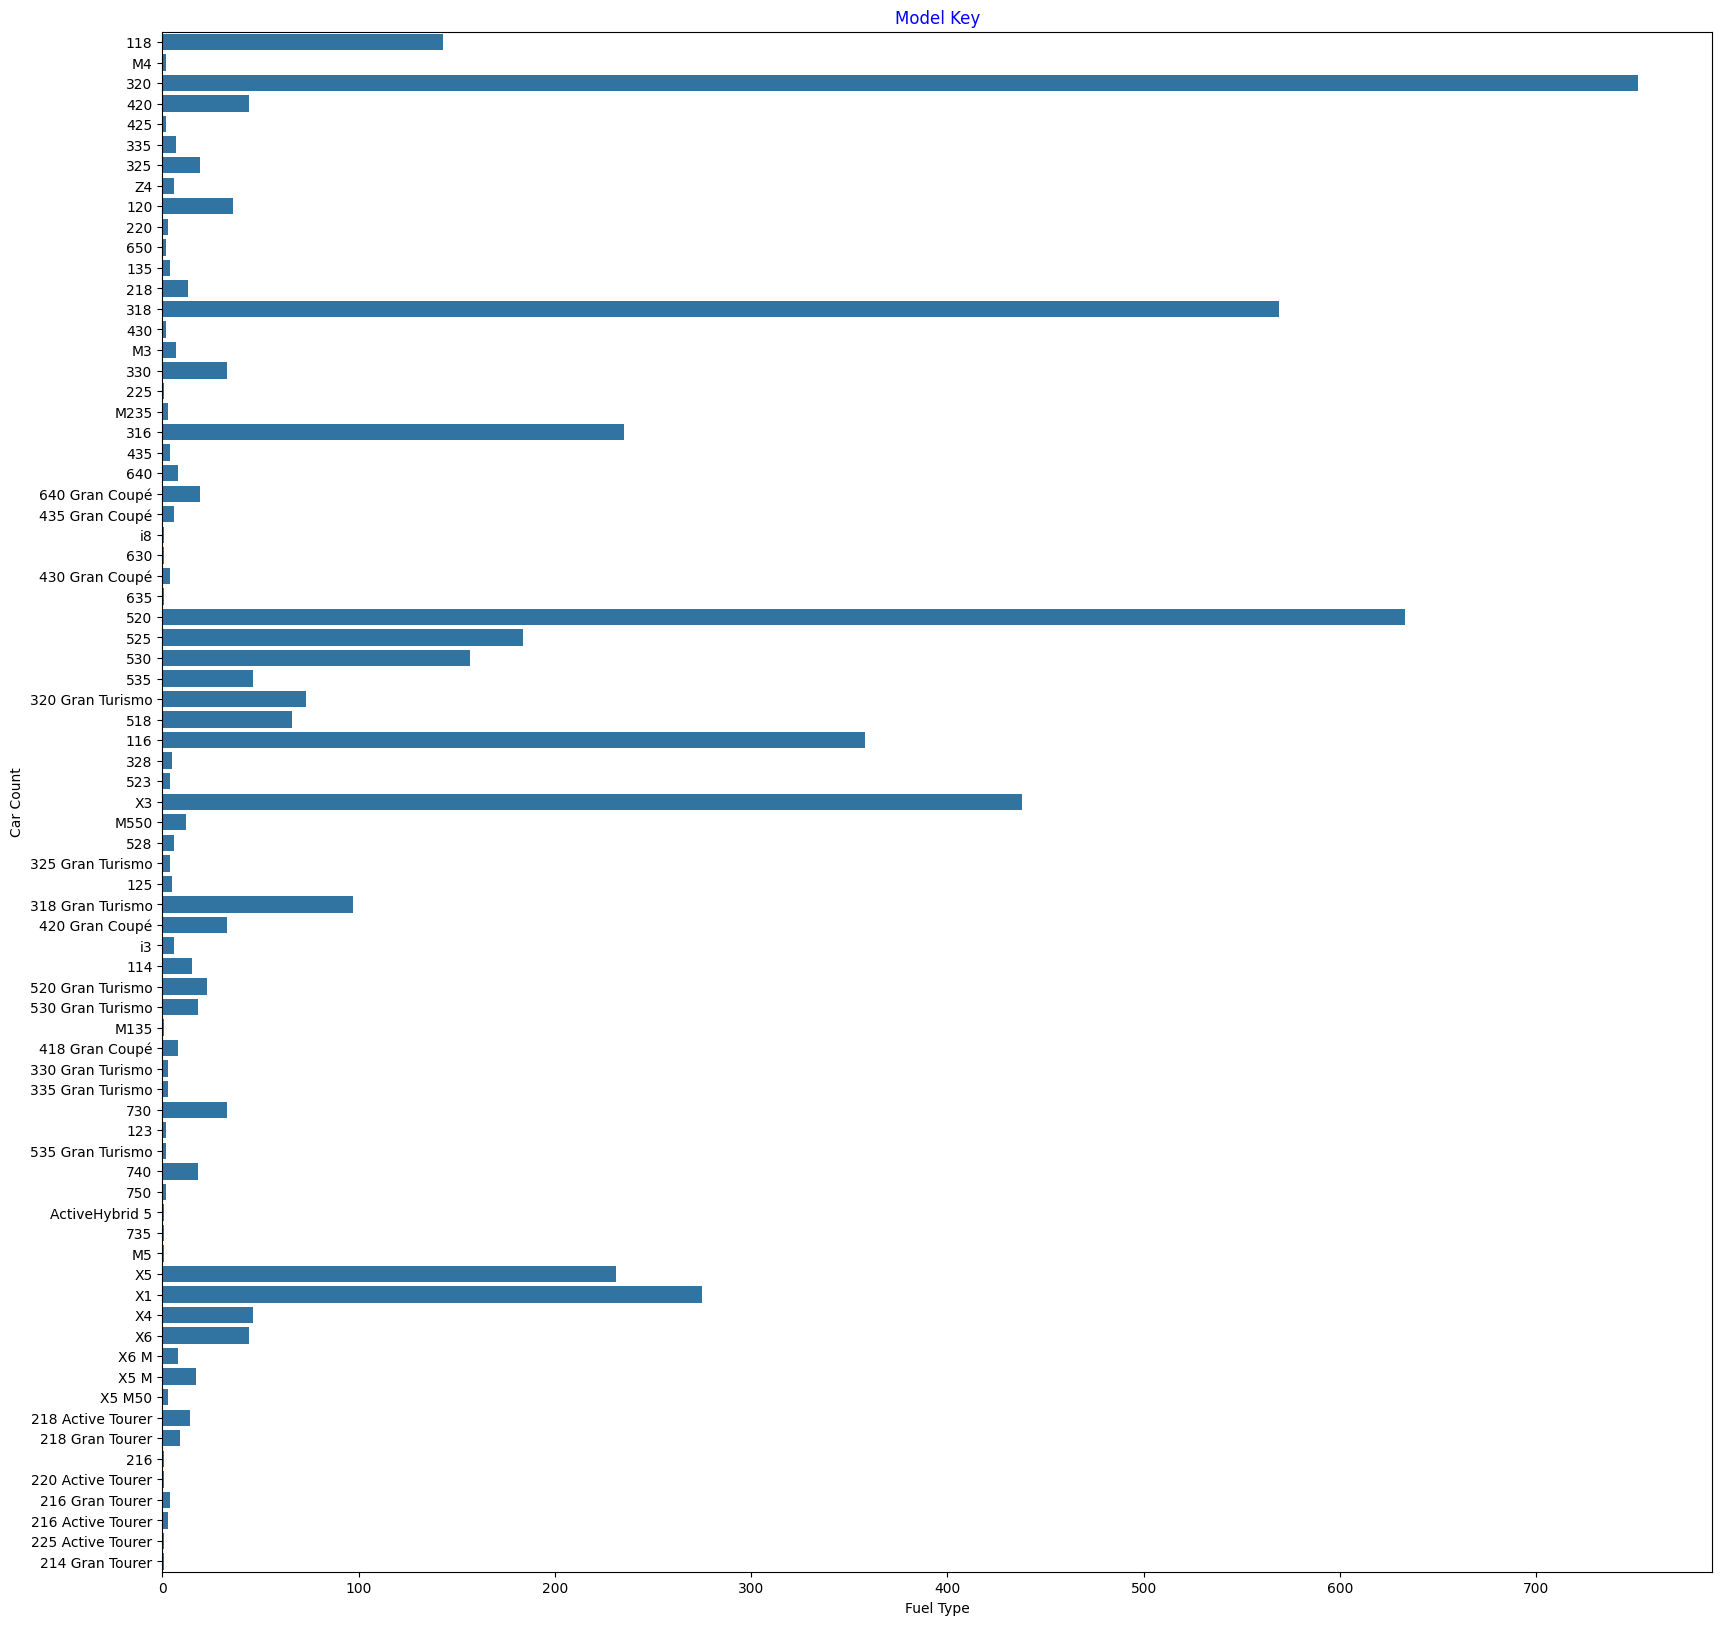

In [23]:
plt.figure(figsize=(20,20))
sns.countplot(y = df['model_key'])
plt.title('Model Key',color="blue")
plt.xlabel("Fuel Type")
plt.ylabel("Car Count")
plt.show()

##### Transformando a coluna Fuel

In [24]:
df['fuel'].value_counts()

fuel
diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

In [25]:
df[df['fuel']=='hybrid_petrol']

,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,...,price,sold_at,registration day,registration month,registration dayofweek,registration year,sold day,sold month,sold dayofweek,sold year
90,i8,12402,170,2016-01-01,hybrid_petrol,grey,coupe,1,1,0,...,95200,2018-04-01,1,1,4,2016,1,4,6,2018
1796,i3,152328,25,2014-02-01,hybrid_petrol,black,hatchback,0,1,0,...,20300,2018-04-01,1,2,5,2014,1,4,6,2018
1925,i3,152470,25,2014-02-01,hybrid_petrol,black,hatchback,0,1,0,...,15500,2018-03-01,1,2,5,2014,1,3,3,2018
2925,ActiveHybrid 5,94374,225,2012-05-01,hybrid_petrol,brown,sedan,1,1,0,...,21100,2018-04-01,1,5,1,2012,1,4,6,2018
3690,i3,6572,75,2015-11-01,hybrid_petrol,black,subcompact,1,1,1,...,28000,2018-03-01,1,11,6,2015,1,3,3,2018
4018,X5,33639,180,2016-06-01,hybrid_petrol,grey,suv,1,1,0,...,52200,2018-03-01,1,6,2,2016,1,3,3,2018
4214,X5,129317,230,2015-12-01,hybrid_petrol,blue,suv,1,0,0,...,46300,2018-04-01,1,12,1,2015,1,4,6,2018
4370,X6,134154,300,2011-04-01,hybrid_petrol,black,suv,1,1,0,...,22000,2018-06-01,1,4,4,2011,1,6,4,2018


In [26]:
### transformando a coluna Fuel

### opcao 1: deletar as ocorrencias de combustível elétrico e híbrido
df2 = df.drop(df[(df['fuel']=='hybrid_petrol') | (df['fuel']=='electro')].index)

In [27]:
df2['fuel'].value_counts()

fuel
diesel    4641
petrol     191
Name: count, dtype: int64

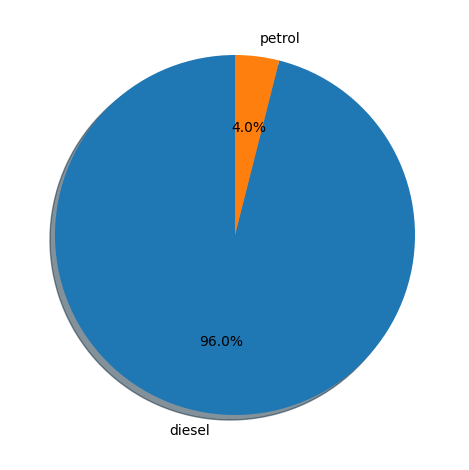

In [28]:
fig, ax1 = plt.subplots()
ax1.pie(df2['fuel'].value_counts(), labels=df2['fuel'].value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.tight_layout()

In [29]:
### opcao 2: deixar a coluna binária (diesel vs outros)
df['fuel'] = df['fuel'].apply(lambda x:'Diesel' if x == 'Diesel' else 'Outros')

In [30]:
df['fuel'].value_counts()

fuel
Outros    4843
Name: count, dtype: int64

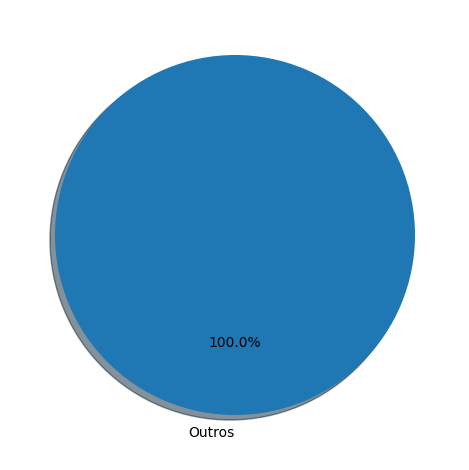

In [31]:
fig, ax1 = plt.subplots()
ax1.pie(df['fuel'].value_counts(), labels=df['fuel'].value_counts().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.tight_layout()

#### Estatística

In [32]:
df.describe()

,mileage,engine_power,registration_date,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,price,sold_at,registration day,registration month,registration dayofweek,registration year,sold day,sold month,sold dayofweek,sold year
count,4.843000e+03,4843.00000,4843,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,...,4843.000000,4843,4843.0,4843.000000,4843.000000,4843.000000,4843.0,4843.000000,4843.000000,4843.0
mean,1.409628e+05,128.98823,2012-11-22 14:51:42.704934912,0.549659,0.792690,0.201941,0.198637,0.460458,0.241379,0.932067,...,15828.081767,2018-04-29 08:15:03.902539520,1.0,6.130911,3.007846,2012.467479,1.0,4.926698,3.406773,2018.0
min,-6.400000e+01,0.00000,1990-03-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,2018-01-01 00:00:00,1.0,1.000000,0.000000,1990.000000,1.0,1.000000,0.000000,2018.0
25%,1.029135e+05,100.00000,2012-07-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,10800.000000,2018-03-01 00:00:00,1.0,3.000000,1.000000,2012.000000,1.0,3.000000,2.000000,2018.0
50%,1.410800e+05,120.00000,2013-07-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,14200.000000,2018-05-01 00:00:00,1.0,6.000000,3.000000,2013.000000,1.0,5.000000,3.000000,2018.0
75%,1.751955e+05,135.00000,2014-04-01 00:00:00,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,18600.000000,2018-07-01 00:00:00,1.0,9.000000,5.000000,2014.000000,1.0,7.000000,6.000000,2018.0
max,1.000376e+06,423.00000,2017-11-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,178500.000000,2018-09-01 00:00:00,1.0,12.000000,6.000000,2017.000000,1.0,9.000000,6.000000,2018.0
std,6.019674e+04,38.99336,NaN,0.497579,0.405421,0.401490,0.399015,0.498485,0.427964,0.251657,...,9220.285684,NaN,0.0,3.315348,2.023494,2.526997,0.0,2.157615,1.895704,0.0


<Axes: >

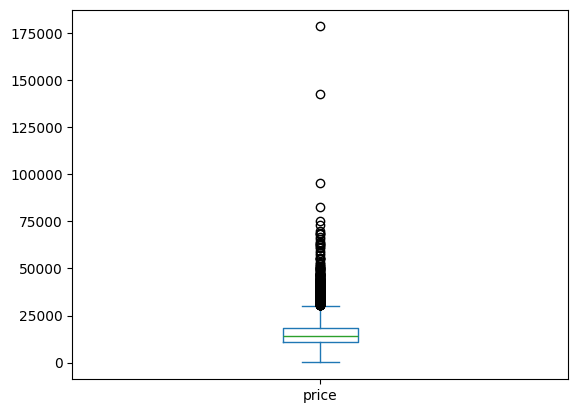

In [33]:
df['price'].plot(kind = 'box')

<Axes: >

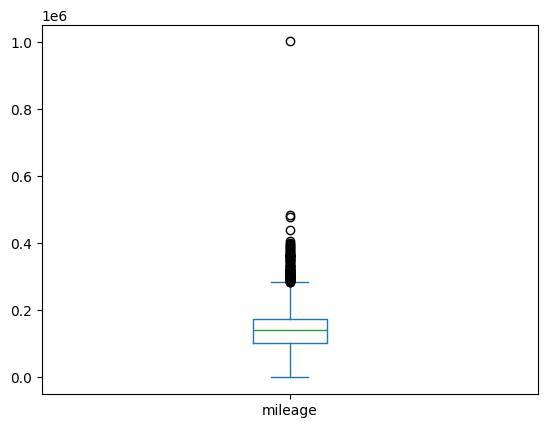

In [34]:
df['mileage'].plot(kind = 'box')

<Axes: >

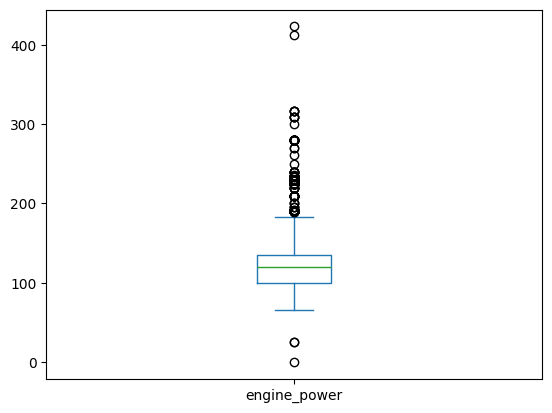

In [35]:
df['engine_power'].plot(kind = 'box')

##### Visualizando as relações entre o alvo e variáveis de entrada

<Axes: xlabel='price', ylabel='model_key'>

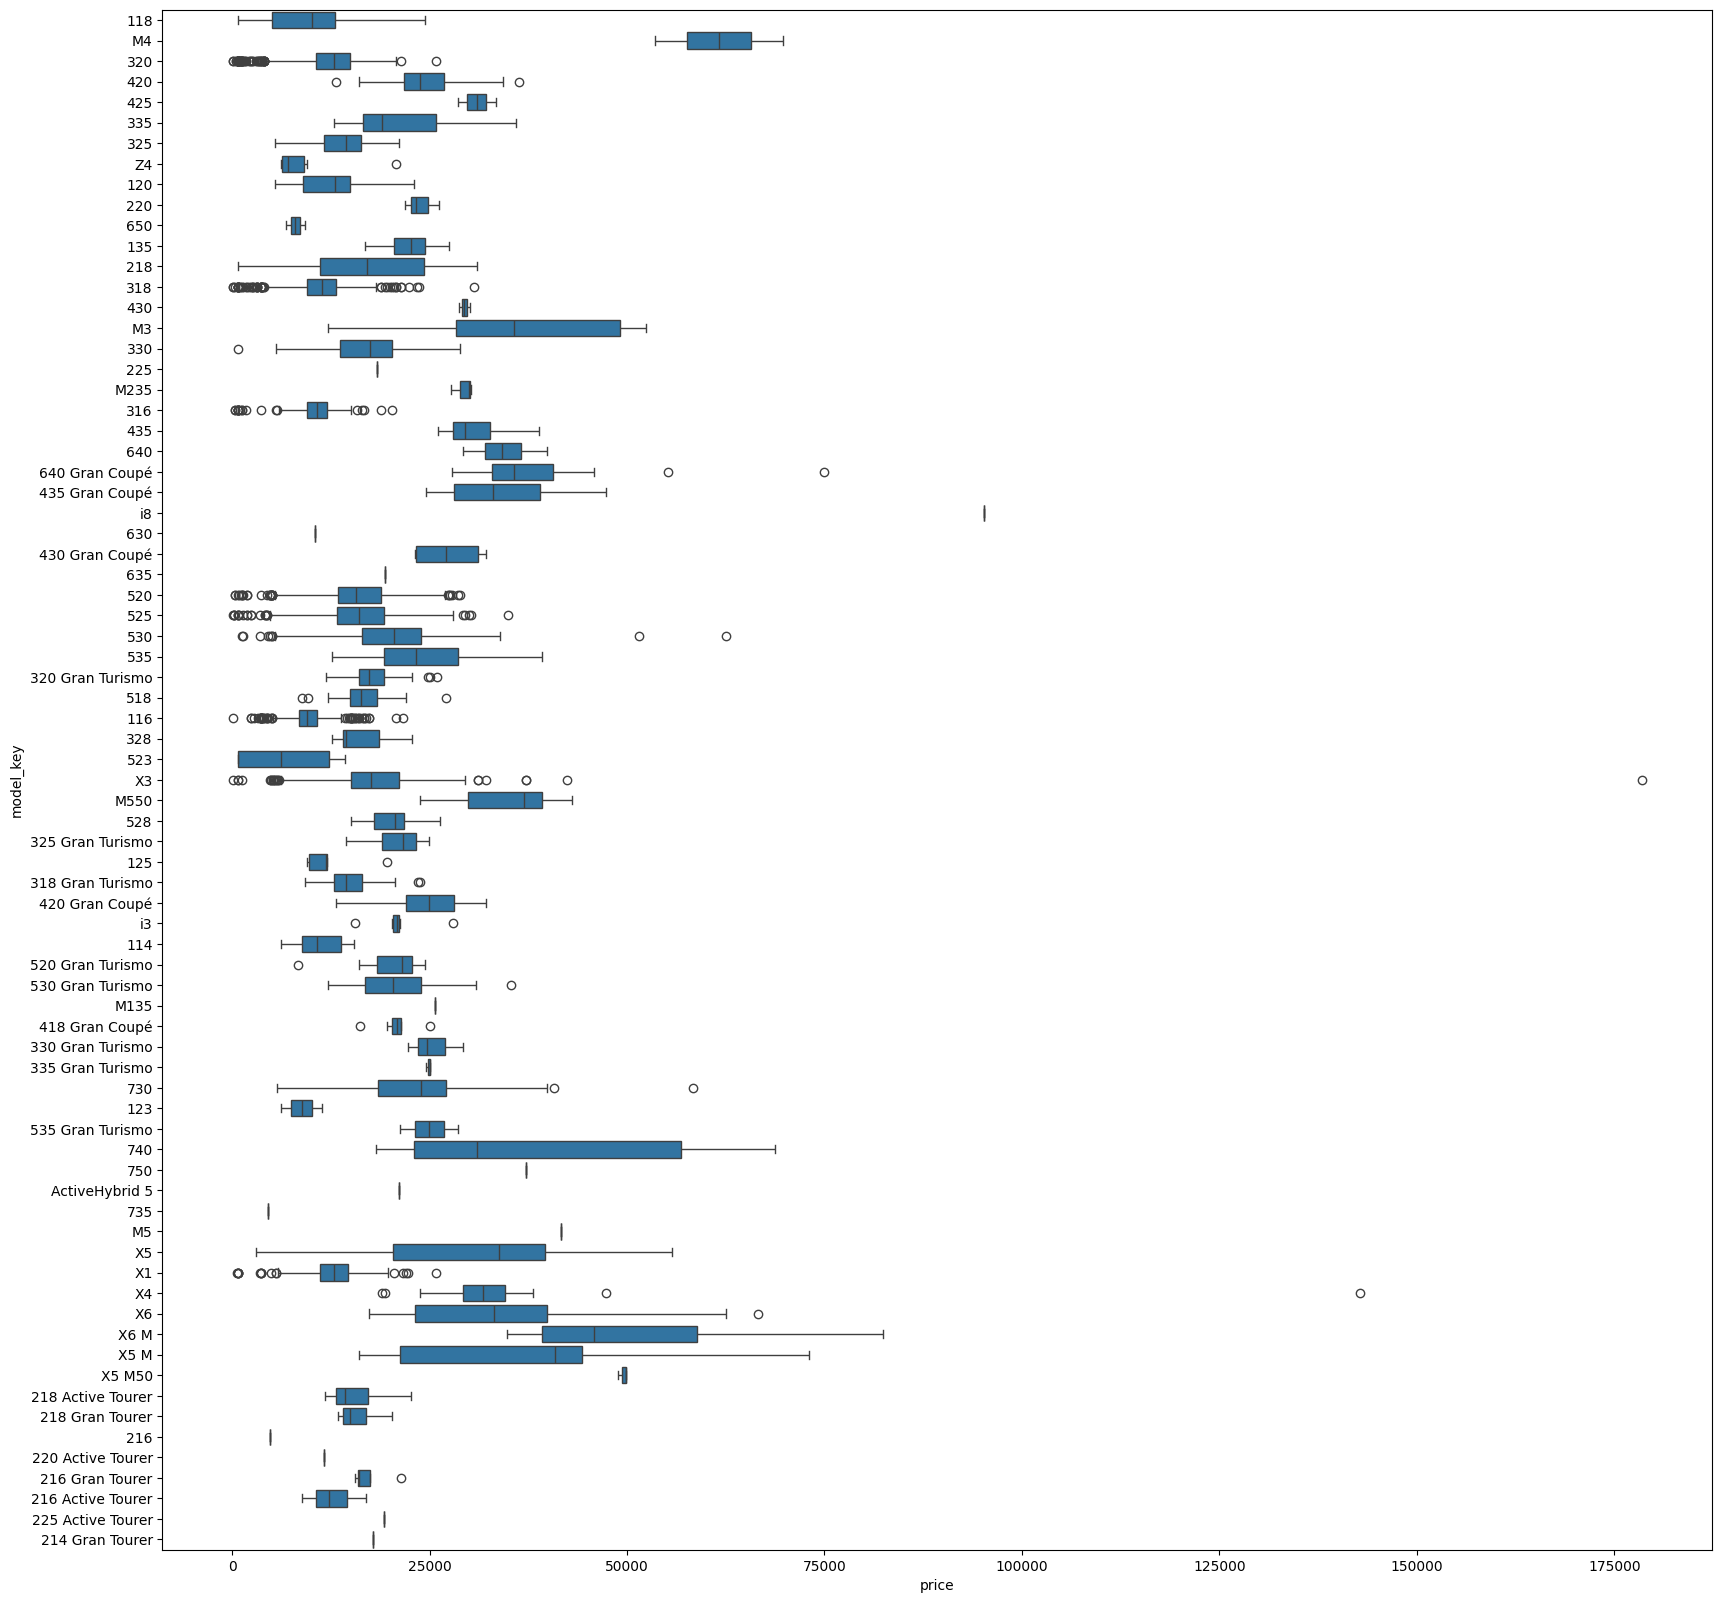

In [36]:
plt.figure(figsize=(20,20))
sns.boxplot(y=df['model_key'], x=df['price'])

<Axes: xlabel='price', ylabel='paint_color'>

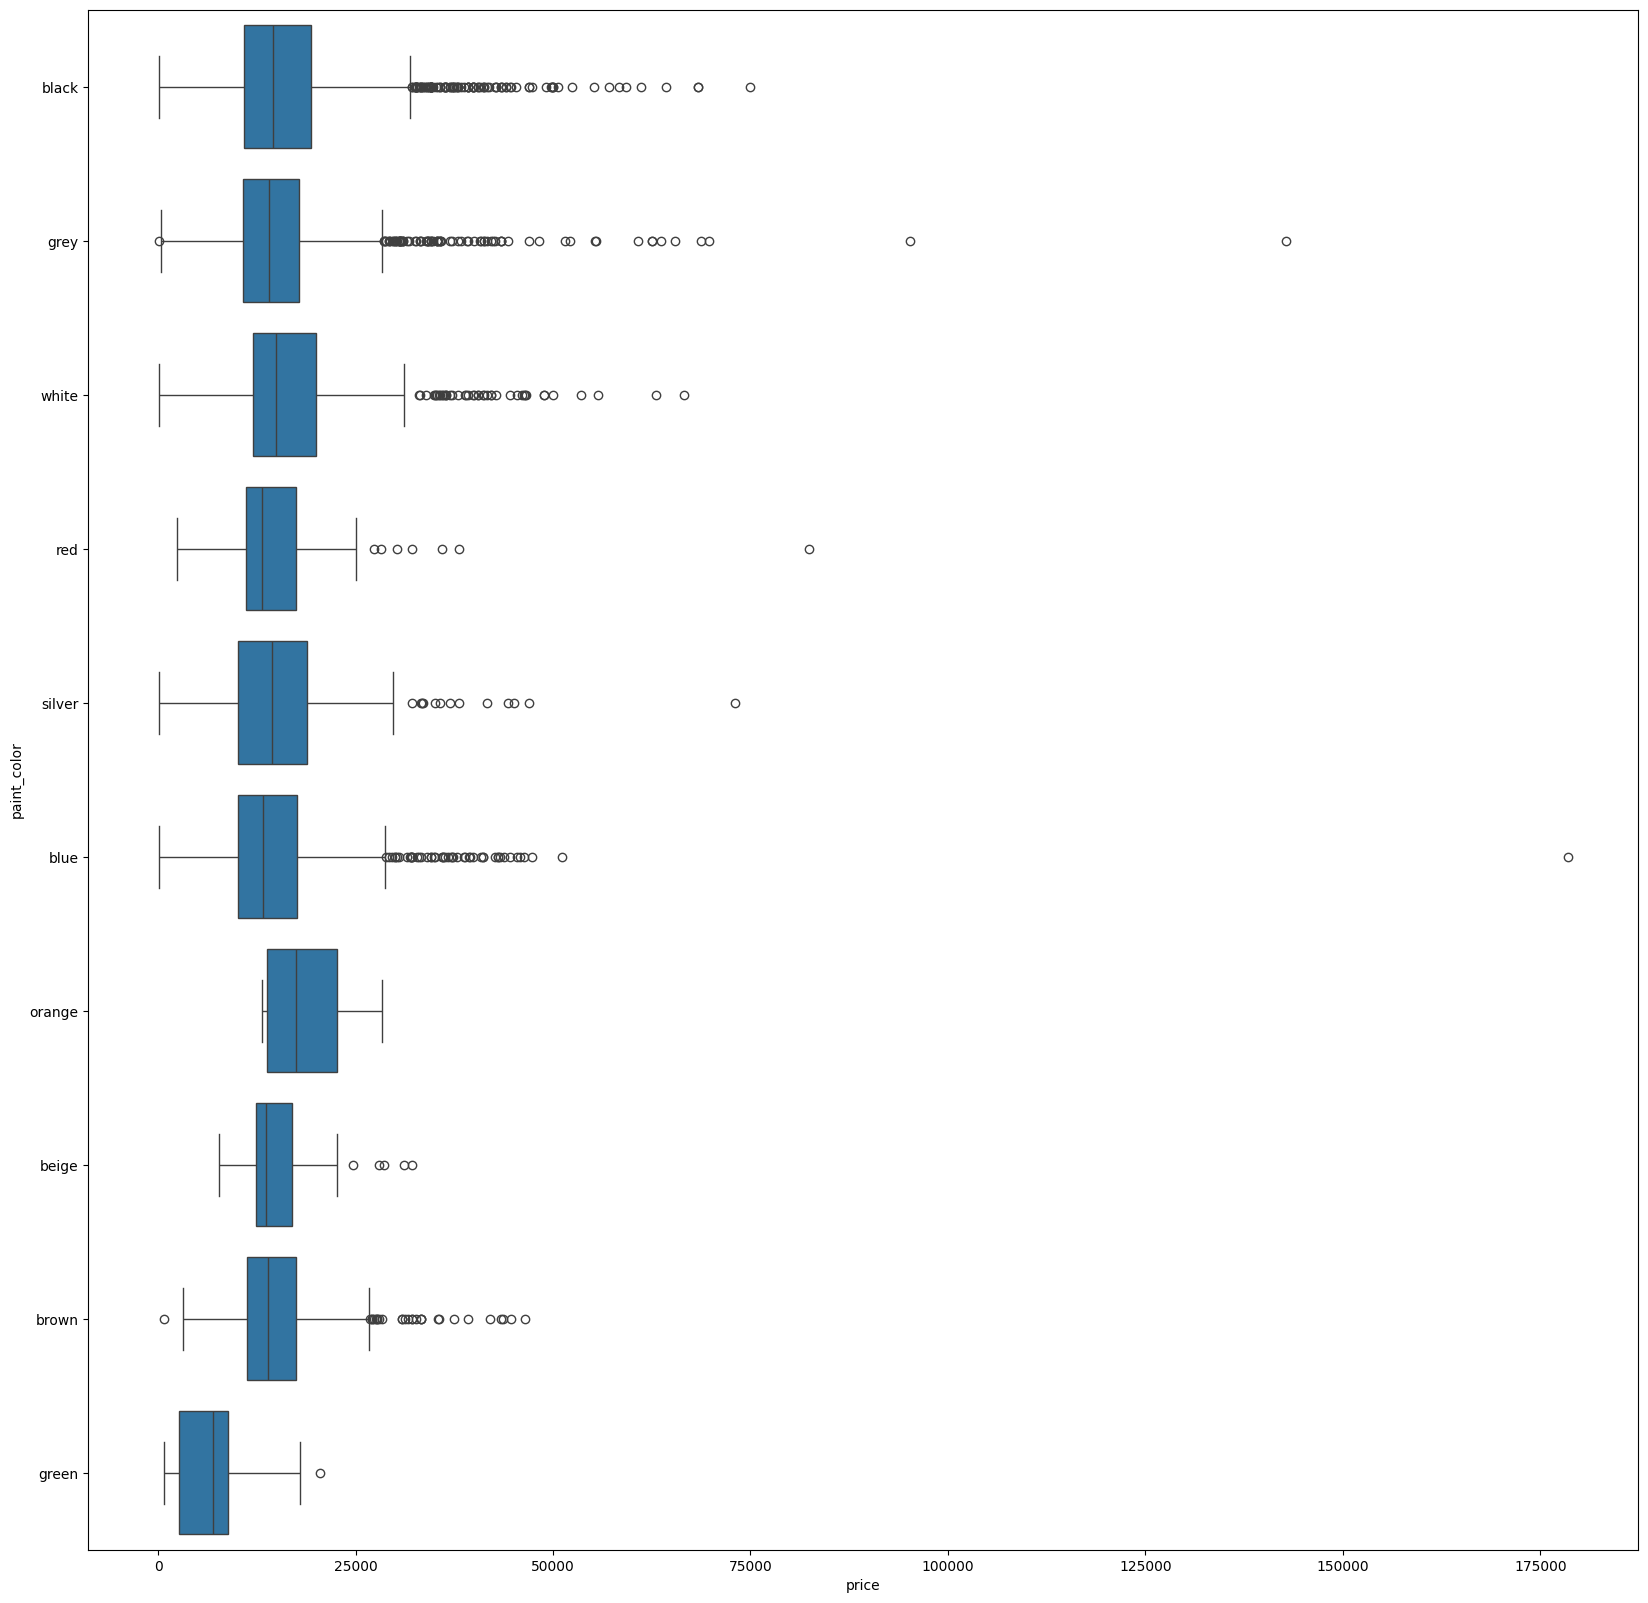

In [37]:
plt.figure(figsize=(20,20))
sns.boxplot(y=df['paint_color'], x=df['price'])

<Axes: xlabel='price', ylabel='car_type'>

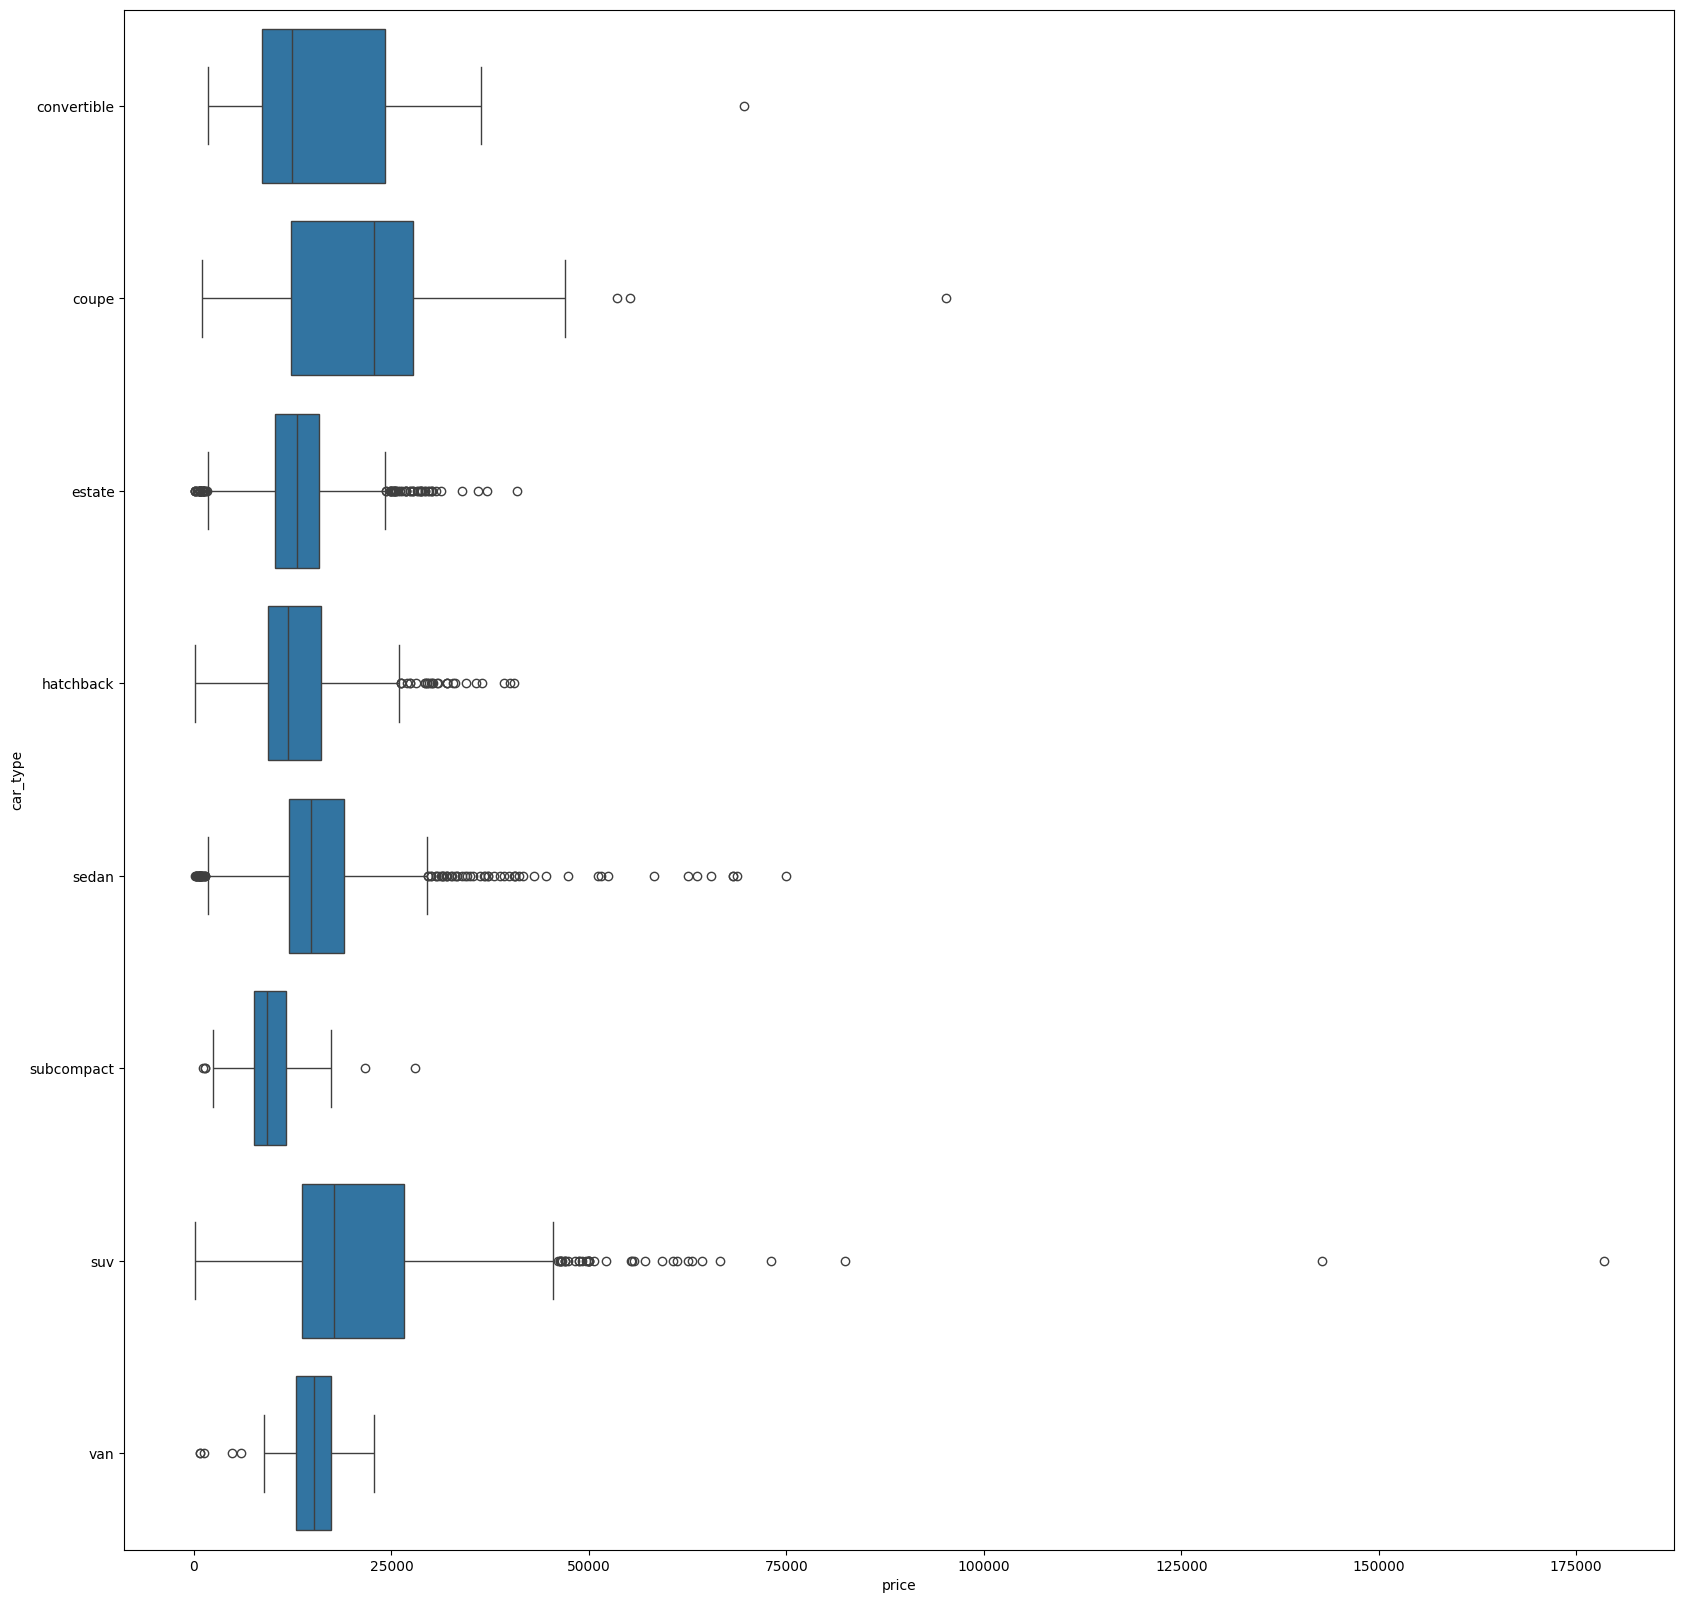

In [38]:
plt.figure(figsize=(20,20))
sns.boxplot(y=df['car_type'], x=df['price'])

<Axes: xlabel='mileage', ylabel='price'>

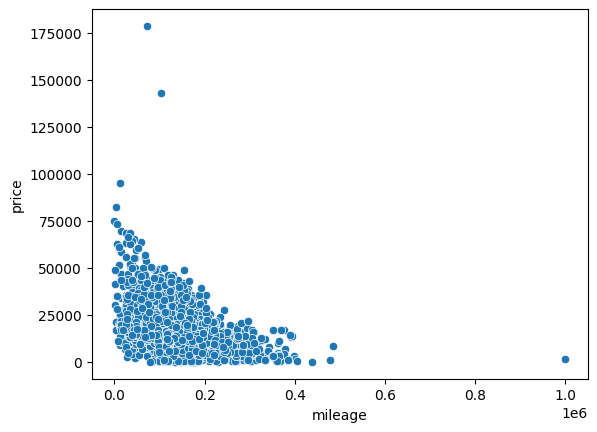

In [39]:
sns.scatterplot(data=df, x="mileage", y="price")

<Axes: xlabel='engine_power', ylabel='price'>

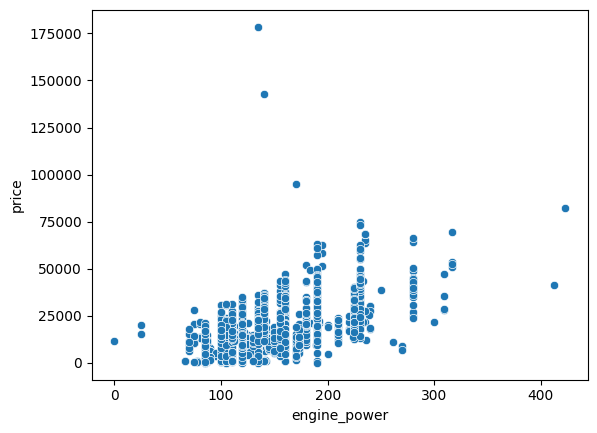

In [40]:
sns.scatterplot(data=df, x="engine_power", y="price")

##### Correlação

In [41]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'M4'

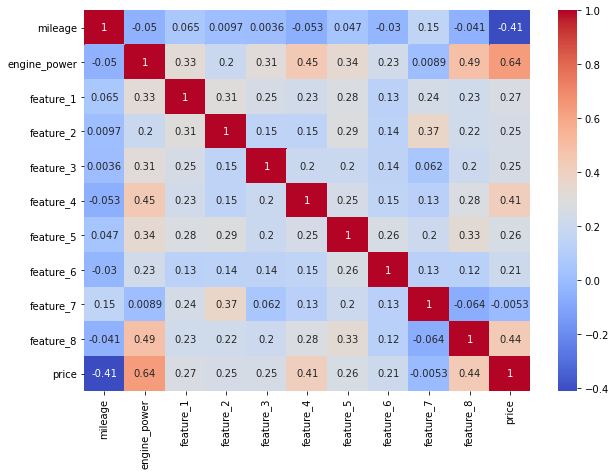

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')